<a href="https://colab.research.google.com/github/joshtburdick/misc/blob/master/plot/2025/250111_Expander.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting an expander

This is an attempt at plotting an expander graph, showing paths of different lengths. It's inspired by [Emanuele Viola's rendering of the Selberg expander](https://emanueleviola.wordpress.com/2024/12/19/youve-seen-a-black-hole-but-have-you-ever-seen-an-expander/).

I used Google Colab's Gemini in writing this. Although it didn't get the Selberg expander right, much of the rest of the code worked.

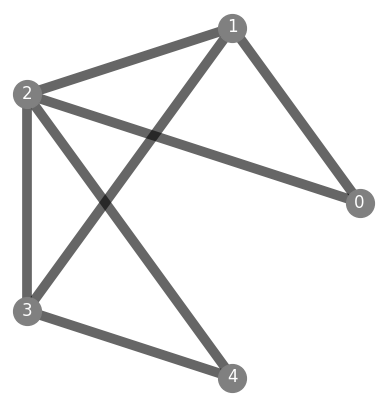

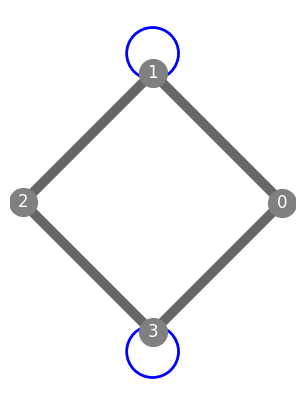

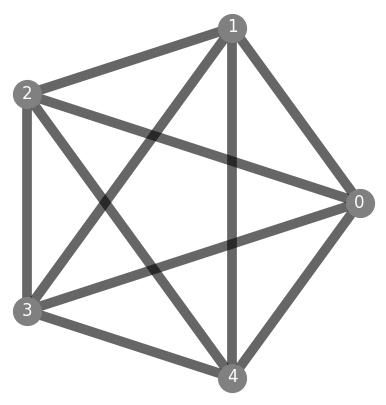

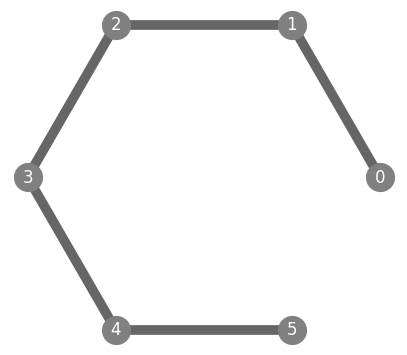

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches # Import for drawing loops

import math

def plot_circular_graph(adjacency_matrix):
    """
    Plots an undirected graph represented by an adjacency matrix with vertices
    arranged in a circle.

    Args:
      adjacency_matrix: A numpy n x n array (or list of lists) representing the
                        adjacency matrix of the graph. 1 indicates an edge, 0 no edge.
    """

    adj_matrix = np.array(adjacency_matrix) # ensure it's a numpy array
    n = adj_matrix.shape[0]  # Number of vertices

    if adj_matrix.shape != (n, n):
        raise ValueError("Adjacency matrix must be square.")

    # 1. Calculate Vertex Positions on a Circle
    angles = np.linspace(0, 2 * np.pi, n, endpoint=False) # angle for each vertex
    x_coords = np.cos(angles)
    y_coords = np.sin(angles)

    # 2. Create the Plot
    plt.figure(figsize=(5, 5)) # set the figure size
    plt.gca().set_aspect('equal') # to make sure the circle is not distorted
    plt.axis('off') # to not show the axes


    # Draw loops
    for i in range(n):
        if adj_matrix[i, i] == 1:  # Check for a loop at vertex i
            # Create a circle patch for the loop
            loop = patches.Circle((1.15*x_coords[i], 1.15*y_coords[i]), radius=0.2,
                                  facecolor='none', edgecolor='b', linewidth=2)
            # Add the loop to the plot
            plt.gca().add_patch(loop)


    # 3. Draw Edges
    for i in range(n):
      for j in range(i + 1, n): # loop through upper triangle of the matrix
        if adj_matrix[i,j] > 0:
          plt.plot(
              [x_coords[i], x_coords[j]], # from vertex i's x to j's x
              [y_coords[i], y_coords[j]], # from vertex i's y to j's y
              color="black",
              linewidth=(7*adj_matrix[i,j]),
              alpha=0.6
              # 'b-', # a solid blue line
              # alpha=adj_matrix[i,j]
          )

    # 4. Draw Vertices (Nodes) as Circles
    plt.scatter(x_coords, y_coords, s = 400, c="grey", zorder = 3) # bigger red points
    # 5. Label Vertices with their Numbers
    for i in range(n):
        plt.text(
            x_coords[i],
            y_coords[i],
            str(i), # node label - 1-indexed
            ha = 'center', # text horizontal alignment
            va = 'center', # text vertical alignment
            fontsize = 12,
            color='white', # text color is white
            zorder = 4,
          )

    # 6. Display the Plot
    # plt.title("Circular Graph Representation")
    plt.show()

if __name__ == '__main__':
    # Example Usage:
    adj_matrix1 = [
      [0, 1, 1, 0, 0],
      [1, 0, 1, 1, 0],
      [1, 1, 0, 1, 1],
      [0, 1, 1, 0, 1],
      [0, 0, 1, 1, 0],
    ]
    plot_circular_graph(adj_matrix1)

    adj_matrix2 = [
        [0, 1, 0, 1],
        [1, 1, 1, 0],
        [0, 1, 0, 1],
        [1, 0, 1, 1]
    ]
    plot_circular_graph(adj_matrix2)

    adj_matrix3 = [[0,1,1,1,1],[1,0,1,1,1],[1,1,0,1,1],[1,1,1,0,1],[1,1,1,1,0]]
    plot_circular_graph(adj_matrix3)

    adj_matrix4 = [
        [0, 1, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0],
        [0, 1, 0, 1, 0, 0],
        [0, 0, 1, 0, 1, 0],
        [0, 0, 0, 1, 0, 1],
        [0, 0, 0, 0, 1, 0]
    ]
    plot_circular_graph(adj_matrix4)


In [ ]:
# prompt: for a small prime n, write the adjacency matrix of the Selberg expander. Treat the first row (and column) of the adjacency matrix as 0 (mod n).

import numpy as np

def selberg_expander(n):
    """
    Generates the adjacency matrix of the Selberg expander for a small prime n.

    Args:
        n: A small prime number.

    Returns:
        A NumPy array representing the adjacency matrix.
    """

    if not is_prime(n):
        raise ValueError("n must be a prime number.")

    adjacency_matrix = np.zeros((n, n), dtype=int)
    for i in range(n):
        for j in range(n):
            if (i != j) and ((j-i)%n == 1 or (i-j)%n == 1 or (i*j)%n==1):
              adjacency_matrix[i][j] = 1

    return adjacency_matrix


def is_prime(num):
  """Primality test using 6k ± 1 optimization."""
  if num <= 3:
    return num > 1
  if not num % 2 or not num % 3:
    return False
  i = 5
  while i * i <= num:
    if not num % i or not num % (i + 2):
      return False
    i += 6
  return True

# Example usage for n = ... (a pretty small prime)
# n = 5
n = 23
adjacency_matrix = selberg_expander(n)
adjacency_matrix

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0],
       [0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0

In [ ]:
# prompt: Given an adjacency matrix (as a numpy matrix of 0's and 1's), compute the corresponding distance matrix.

import numpy as np

def compute_distance_matrix(adjacency_matrix):
    """
    Computes the distance matrix from an adjacency matrix.

    Args:
      adjacency_matrix: A NumPy array representing the adjacency matrix.

    Returns:
      A NumPy array representing the distance matrix.
    """
    n = adjacency_matrix.shape[0]
    distance_matrix = np.full((n, n), np.inf)  # Initialize with infinity

    # Set diagonal elements to 0 (distance from a node to itself)
    np.fill_diagonal(distance_matrix, 0)

    # Set distances for directly connected nodes to 1
    distance_matrix[adjacency_matrix == 1] = 1

    # Floyd-Warshall algorithm to compute shortest path distances
    for k in range(n):
        for i in range(n):
            for j in range(n):
                distance_matrix[i, j] = min(distance_matrix[i, j],
                                            distance_matrix[i, k] + distance_matrix[k, j])

    return distance_matrix

# Example Usage (assuming 'adjacency_matrix' is defined from the previous code)
# Replace this example with your adjacency matrix
# adjacency_matrix = np.array([[0, 1, 0, 0], [1, 0, 1, 0], [0, 1, 0, 1], [0, 0, 1, 0]])

distance_matrix = compute_distance_matrix(adjacency_matrix)
print(distance_matrix)

[[0. 1. 2. 3. 4. 5. 5. 5. 4. 5. 4. 3. 3. 4. 5. 4. 5. 5. 5. 4. 3. 2. 1.]
 [1. 0. 1. 2. 3. 4. 4. 4. 3. 4. 4. 3. 2. 3. 4. 5. 4. 5. 5. 5. 4. 3. 2.]
 [2. 1. 0. 1. 2. 3. 3. 3. 2. 3. 3. 2. 1. 2. 3. 4. 3. 4. 4. 5. 4. 3. 3.]
 [3. 2. 1. 0. 1. 2. 2. 2. 1. 2. 3. 3. 2. 3. 3. 4. 4. 4. 3. 4. 5. 4. 4.]
 [4. 3. 2. 1. 0. 1. 1. 2. 2. 3. 3. 4. 3. 3. 2. 3. 4. 5. 4. 5. 4. 5. 5.]
 [5. 4. 3. 2. 1. 0. 1. 2. 3. 4. 3. 4. 3. 2. 1. 2. 3. 4. 5. 4. 3. 4. 5.]
 [5. 4. 3. 2. 1. 1. 0. 1. 2. 3. 2. 3. 4. 3. 2. 3. 4. 5. 4. 5. 4. 4. 5.]
 [5. 4. 3. 2. 2. 2. 1. 0. 1. 2. 1. 2. 3. 4. 3. 4. 5. 4. 3. 4. 4. 3. 4.]
 [4. 3. 2. 1. 2. 3. 2. 1. 0. 1. 2. 3. 3. 4. 4. 5. 4. 3. 2. 3. 4. 4. 5.]
 [5. 4. 3. 2. 3. 4. 3. 2. 1. 0. 1. 2. 3. 4. 5. 4. 3. 2. 1. 2. 3. 3. 4.]
 [4. 4. 3. 3. 3. 3. 2. 1. 2. 1. 0. 1. 2. 3. 4. 4. 4. 3. 2. 3. 3. 2. 3.]
 [3. 3. 2. 3. 4. 4. 3. 2. 3. 2. 1. 0. 1. 2. 3. 3. 3. 4. 3. 3. 2. 1. 2.]
 [3. 2. 1. 2. 3. 3. 4. 3. 3. 3. 2. 1. 0. 1. 2. 3. 2. 3. 4. 4. 3. 2. 3.]
 [4. 3. 2. 3. 3. 2. 3. 4. 4. 4. 3. 2. 1. 0. 1. 2. 1. 2. 3. 3. 3.

## Combining these

Putting these together, we plot the expander graph distance matrix.

In [ ]:
compute_distance_matrix(selberg_expander(7))

array([[0., 1., 2., 3., 3., 2., 1.],
       [1., 0., 1., 2., 2., 3., 2.],
       [2., 1., 0., 1., 1., 2., 3.],
       [3., 2., 1., 0., 1., 1., 2.],
       [3., 2., 1., 1., 0., 1., 2.],
       [2., 3., 2., 1., 1., 0., 1.],
       [1., 2., 3., 2., 2., 1., 0.]])

In [ ]:
def plot_selberg_expander(n):
  adjacency_matrix = selberg_expander(n)
  distance_matrix = compute_distance_matrix(adjacency_matrix)
  max_dist = np.max(distance_matrix)
  alpha = 1 - (distance_matrix)/(max_dist+1)
  np.fill_diagonal(alpha, 0)
  # print(alpha)
  plot_circular_graph(alpha)

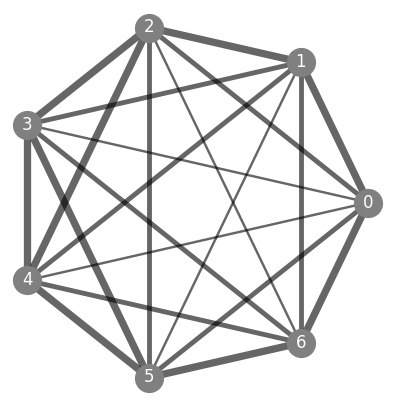

In [ ]:
plot_selberg_expander(7)

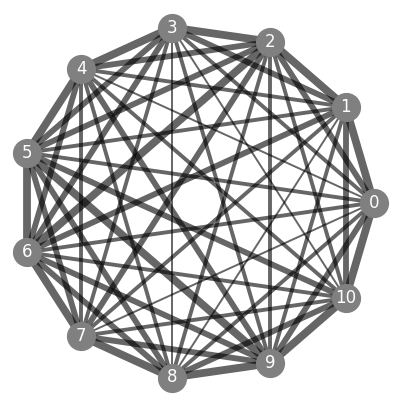

In [ ]:
plot_selberg_expander(11)

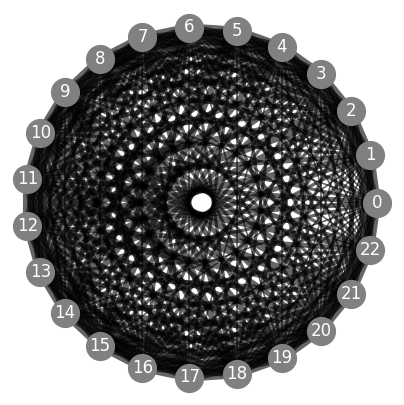

In [ ]:
plot_selberg_expander(23)

That doesn't look as interesting as I'd hoped it would...

In [ ]:
selberg_expander(7)

array([[0, 1, 0, 0, 0, 0, 1],
       [1, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 1, 1, 0, 0],
       [0, 0, 1, 0, 1, 1, 0],
       [0, 0, 1, 1, 0, 1, 0],
       [0, 0, 0, 1, 1, 0, 1],
       [1, 0, 0, 0, 0, 1, 0]])